
# Preprocessing

### import libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### import dataset


In [2]:
df = pd.read_csv('F:/SeoulBikeData.csv', encoding='latin-1')
df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
df.dtypes


Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Date column format (object to datetime)

In [4]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

### delete non-functioning rows


In [5]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [6]:
df = df[df['Functioning Day'] != 'No']
del df['Functioning Day']
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


### missing values


In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
dtype: int64

### duplicate values


In [8]:
df.duplicated().sum()

0

### checking the amount of demand over time

In [9]:
df['Date'].dt.year.value_counts()

2018    7721
2017     744
Name: Date, dtype: int64

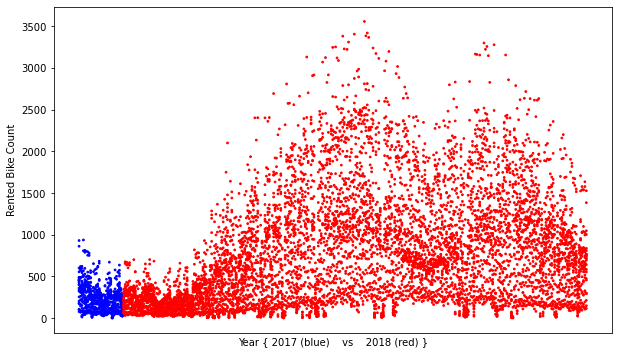

In [10]:
from datetime import datetime

df_sorted = df.sort_values(by='Date')
df_sorted['Date'] = df_sorted['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_sorted['Year'] = df_sorted['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
colors = ['blue' if year == 2017 else 'red' for year in df_sorted['Year']]
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['Date'], df_sorted['Rented Bike Count'], c=colors, s=3)
plt.xlabel('Year { 2017 (blue)    vs    2018 (red) }')
plt.ylabel('Rented Bike Count')
plt.xticks([],[])
plt.show()

In [11]:
#deleting 2017 records
df = df.loc[~(df['Date'].dt.year == 2017)]

In [12]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday
745,2018-01-01,230,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,Winter,Holiday
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,Winter,Holiday
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,Winter,Holiday
748,2018-01-01,62,4,-4.2,53,1.1,1994,-12.3,0.0,0.0,0.0,Winter,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


### outlier data

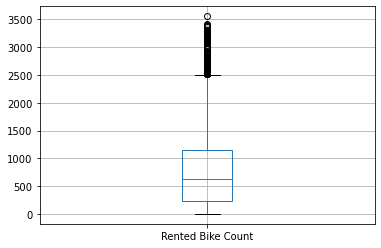

In [13]:
df[['Rented Bike Count']].boxplot()
Q1 = df[['Rented Bike Count']].quantile(0.25)
Q3 = df[['Rented Bike Count']].quantile(0.75)
LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)

#deleting outlier data
df[df['Rented Bike Count'] >  int(UB)].shape
df = df[df['Rented Bike Count'] <=  int(UB)].reset_index().drop('index', axis = 1)

In [14]:
df5 = df.copy()

### hourly bicycle demand distribution

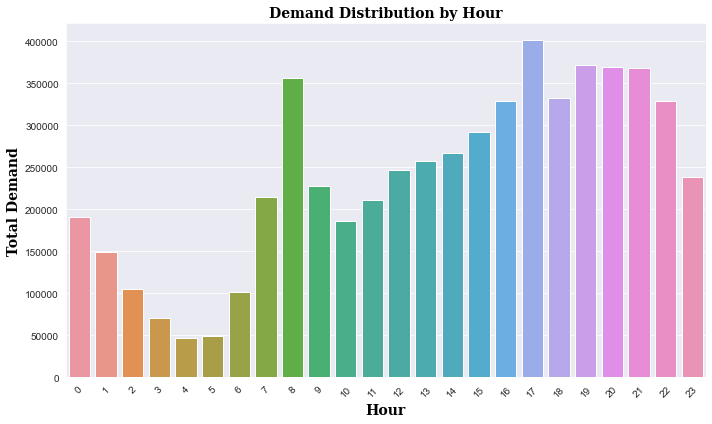

In [15]:
#hourly demand
hourly_demand = df.groupby('Hour')['Rented Bike Count'].sum()

sns.set_palette("pastel")
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'bold',
        'size': 14}
plt.xlabel('Hour', fontdict=font)
plt.ylabel('Total Demand', fontdict=font)
plt.title('Demand Distribution by Hour', fontdict=font)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### daily bicycle demand distribution

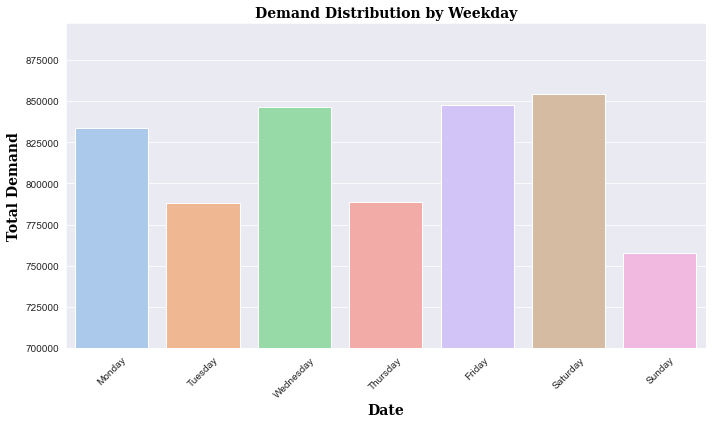

In [16]:
#daily demand
df['Weekday'] = pd.to_datetime(df['Date']).dt.strftime('%A')
df['Weekday'] = pd.Categorical(df['Weekday'], categories=['Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
demand_by_weekday = df.groupby('Weekday')['Rented Bike Count'].sum()
sns.set_palette("pastel")
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=demand_by_weekday.index, y=demand_by_weekday.values)
plt.xlabel('Date', fontdict=font)
plt.ylabel('Total Demand', fontdict=font)
plt.title('Demand Distribution by Weekday', fontdict=font)
plt.xticks(rotation=45)
plt.ylim(700000,)
plt.tight_layout()
plt.show()

### monthly bicycle demand distribution

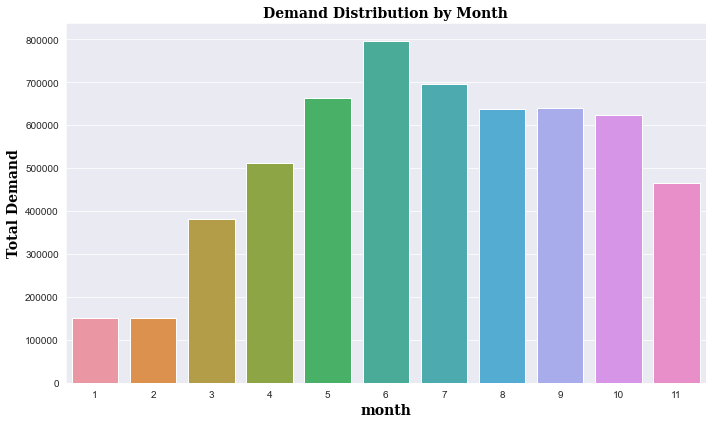

In [17]:
# monthly demand
df['Month'] = df['Date'].dt.month
monthly_demand = df.groupby('Month')['Rented Bike Count'].sum()

sns.set_palette("pastel")
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_demand.index, y=monthly_demand.values)
font = {'family': 'serif',
        'color': 'black',
        'weight': 'bold',
        'size': 14}
plt.xlabel('month', fontdict=font)
plt.ylabel('Total Demand', fontdict=font)
plt.title('Demand Distribution by Month', fontdict=font)
plt.xticks()
plt.tight_layout()
plt.show()

### seasonal bicycle demand distribution

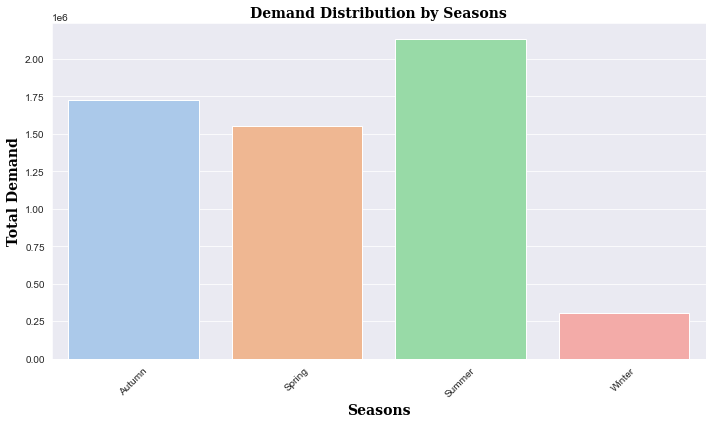

In [18]:
#seasonal demand
seasonal_demand = df.groupby('Seasons')['Rented Bike Count'].sum()
sns.set_palette("pastel")
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values)
plt.xlabel('Seasons', fontdict=font)
plt.ylabel('Total Demand', fontdict=font)
plt.title('Demand Distribution by Seasons', fontdict=font)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### boxplot for holidays and non-holidays

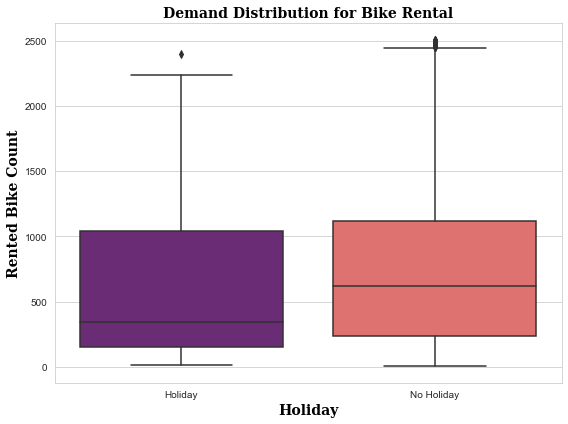

In [19]:
data_holiday = df[df['Holiday'] == 'Holiday']
data_non_holiday = df[df['Holiday'] == 'No Holiday']

sns.set_palette("pastel")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday', y='Rented Bike Count', data=df, palette="magma")
plt.xlabel('Holiday', fontdict=font)
plt.ylabel('Rented Bike Count', fontdict=font)
plt.title('Demand Distribution for Bike Rental', fontdict=font)
plt.tight_layout()
plt.show()

### Check the significant difference between these two values

In [20]:
#anderson-darling
result1 = stats.anderson(data_holiday['Rented Bike Count'],dist='norm')
result2 = stats.anderson(data_non_holiday['Rented Bike Count'],dist='norm')

if result1.statistic <=  result1.critical_values[2] and result2.statistic <=  result2.critical_values[2] :  
    #two sample t-test
    t_statistic, p_value = stats.ttest_ind(data_holiday['Rented Bike Count'], data_non_holiday['Rented Bike Count']) 
else:
    #kruskal-wallis
    H, p_value = stats.kruskal(data_holiday['Rented Bike Count'], data_non_holiday['Rented Bike Count'])

if p_value < 0.05:
    print('There is a significant difference between the two groups')
else:
    print('There is no significant difference between the two groups')

There is a significant difference between the two groups


# Correlation analysis and Lasso algorithm

### convert holiday column to dummy varibale

In [21]:
df['Holiday'].value_counts()

No Holiday    7315
Holiday        312
Name: Holiday, dtype: int64

In [22]:
df = df.replace({"Holiday": 'No Holiday'}, 0).replace({'Holiday':"Holiday"}, 1)

### make a copy of df for arima

In [23]:
#data for arima
df_arm = df.copy()

### data preparation for random forest

In [24]:
del df['Date']

df_rf=df.copy()
df_rf['Weekday'] = df_rf['Weekday'].replace({'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 0, 'Sunday': 1})
df_rf['Seasons'] = df_rf['Seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})

### convert object columns to dummy variables

In [25]:
from num2words import num2words

df['Hour'] = df['Hour'].apply(lambda x: num2words(x))
df['Month'] = df['Month'].apply(lambda x: num2words(x))

# making dummy variables
df = pd.get_dummies(df)
df = df.drop('Hour_five', axis=1)
df = df.drop('Month_five', axis=1)
df = df.drop('Seasons_Winter', axis=1)
df = df.drop('Weekday_Sunday', axis=1)

### correlation matrix

In [26]:
#correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month_eight,Month_eleven,Month_four,Month_nine,Month_one,Month_seven,Month_six,Month_ten,Month_three,Month_two
Rented Bike Count,1.000000,0.533310,-0.218379,0.120857,0.213503,0.361276,0.269218,-0.143552,-0.124783,-0.037351,...,0.061075,-0.015348,-0.005154,0.141765,-0.294231,0.107810,0.211778,0.101744,-0.127797,-0.265832
Temperature(°C),0.533310,1.000000,0.165361,-0.046369,0.031946,0.907678,0.336742,0.045895,-0.193875,-0.031164,...,0.412160,-0.175028,-0.031299,0.193478,-0.507951,0.381808,0.241549,-0.037775,-0.169664,-0.419454
Humidity(%),-0.218379,0.165361,1.000000,-0.330738,-0.518486,0.551479,-0.475876,0.243097,0.074406,-0.075941,...,0.103041,-0.024313,-0.057396,0.042478,-0.166695,0.144662,0.071914,0.013217,0.013068,-0.206523
Wind speed (m/s),0.120857,-0.046369,-0.330738,1.000000,0.160823,-0.186342,0.336127,-0.023595,0.027622,0.025238,...,-0.005360,-0.110166,0.069438,-0.041190,0.049887,-0.088061,-0.025078,-0.050110,0.065666,0.141265
Visibility (10m),0.213503,0.031946,-0.518486,0.160823,1.000000,-0.175671,0.149312,-0.178124,-0.074582,0.065558,...,0.148363,-0.110834,-0.059269,0.180085,0.010622,0.050262,-0.110533,0.107072,-0.163341,0.060203
Dew point temperature(°C),0.361276,0.907678,0.551479,-0.186342,-0.175671,1.000000,0.065329,0.125815,-0.139682,-0.055362,...,0.395876,-0.161445,-0.066614,0.183946,-0.488783,0.387830,0.233449,-0.026301,-0.140403,-0.441344
Solar Radiation (MJ/m2),0.269218,0.336742,-0.475876,0.336127,0.149312,0.065329,1.000000,-0.079032,-0.055624,0.017009,...,0.033817,-0.081741,0.034465,0.023587,-0.137423,0.054075,0.085656,-0.018793,-0.000920,-0.041788
Rainfall(mm),-0.143552,0.045895,0.243097,-0.023595,-0.178124,0.125815,-0.079032,1.000000,0.013299,-0.021226,...,0.031537,-0.017667,0.007418,-0.012446,-0.041798,0.025779,0.023812,-0.002351,-0.025639,-0.031681
Snowfall (cm),-0.124783,-0.193875,0.074406,0.027622,-0.074582,-0.139682,-0.055624,0.013299,1.000000,-0.027911,...,-0.044267,0.115051,-0.042657,-0.039953,0.182358,-0.043968,-0.042487,-0.041423,-0.044432,0.043703
Holiday,-0.037351,-0.031164,-0.075941,0.025238,0.065558,-0.055362,0.017009,-0.021226,-0.027911,1.000000,...,-0.013942,-0.062930,-0.065186,0.114248,-0.014356,-0.067190,-0.009399,-0.006601,-0.014356,0.103943


In [27]:
columns_to_drop = correlation_matrix.columns[abs(correlation_matrix.iloc[:, 0]) < 0.15]  
columns_to_drop

Index(['Wind speed (m/s)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Hour_eight', 'Hour_eleven', 'Hour_fifteen', 'Hour_fourteen',
       'Hour_nine', 'Hour_one', 'Hour_seven', 'Hour_six', 'Hour_sixteen',
       'Hour_ten', 'Hour_thirteen', 'Hour_twelve', 'Hour_twenty',
       'Hour_twenty-one', 'Hour_twenty-three', 'Hour_twenty-two', 'Hour_two',
       'Hour_zero', 'Seasons_Autumn', 'Seasons_Spring', 'Weekday_Monday',
       'Weekday_Tuesday', 'Weekday_Wednesday', 'Weekday_Thursday',
       'Weekday_Friday', 'Weekday_Saturday', 'Month_eight', 'Month_eleven',
       'Month_four', 'Month_nine', 'Month_seven', 'Month_ten', 'Month_three'],
      dtype='object')

In [28]:
# deleting unimportant and correlated columns
df1 = df.drop(columns_to_drop, axis=1)
df1 = df1.drop(['Seasons_Summer'], axis=1)
df1 = df1.drop(['Dew point temperature(°C)'], axis=1)

In [29]:
df1

,Rented Bike Count,Temperature(°C),Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Hour_eighteen,Hour_four,Hour_nineteen,Hour_seventeen,Hour_three,Month_one,Month_six,Month_two
0,206,-3.2,40,1358,0.0,0,0,0,0,0,1,0,0
1,230,-3.3,41,2000,0.0,0,0,0,0,0,1,0,0
2,178,-3.7,42,2000,0.0,0,0,0,0,0,1,0,0
3,119,-4.0,44,2000,0.0,0,0,0,0,1,1,0,0
4,62,-4.2,53,1994,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7622,1003,4.2,34,1894,0.0,0,0,1,0,0,0,0,0
7623,764,3.4,37,2000,0.0,0,0,0,0,0,0,0,0
7624,694,2.6,39,1968,0.0,0,0,0,0,0,0,0,0
7625,712,2.1,41,1859,0.0,0,0,0,0,0,0,0,0


## feature selection with lasso

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

#Spliting the Dataset into the Training set and the Test set
X = df1.iloc[:,1:]
Y = df1.iloc[:,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

pipeline = Pipeline([('scaler', StandardScaler()) , ('model', Lasso()) ])
     
search = GridSearchCV(pipeline, {'model__alpha':np.arange(0.1,3,0.05)},
                                  cv = 5, scoring = 'neg_mean_squared_error', verbose = 3)
     
search.fit(X_train, Y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits
[CV 1/5] END ............model__alpha=0.1;, score=-184663.983 total time=   0.6s
[CV 2/5] END ............model__alpha=0.1;, score=-181620.926 total time=   0.0s
[CV 3/5] END ............model__alpha=0.1;, score=-173862.030 total time=   0.0s
[CV 4/5] END ............model__alpha=0.1;, score=-185747.514 total time=   0.0s
[CV 5/5] END ............model__alpha=0.1;, score=-189069.324 total time=   0.0s
[CV 1/5] END model__alpha=0.15000000000000002;, score=-184676.913 total time=   0.0s
[CV 2/5] END model__alpha=0.15000000000000002;, score=-181626.736 total time=   0.0s
[CV 3/5] END model__alpha=0.15000000000000002;, score=-173853.014 total time=   0.0s
[CV 4/5] END model__alpha=0.15000000000000002;, score=-185737.368 total time=   0.0s
[CV 5/5] END model__alpha=0.15000000000000002;, score=-189072.135 total time=   0.0s
[CV 1/5] END model__alpha=0.20000000000000004;, score=-184689.826 total time=   0.0s
[CV 2/5] END model__alp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15,
       1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65, 1.7 ,
       1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25,
       2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 ,
       2.85, 2.9 , 2.95])},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
# choosing best alpha
search.best_params_

{'model__alpha': 0.1}

In [32]:
coef = search.best_estimator_[1].coef_
sorted(abs(coef))

[31.341066680182482,
 64.1948988482894,
 65.39318824949754,
 70.12151191008229,
 79.30413456620205,
 87.61341634432208,
 94.38075382225342,
 98.5382752951519,
 100.87417413605021,
 109.20660802312942,
 203.7728024552551,
 253.0376055991213]

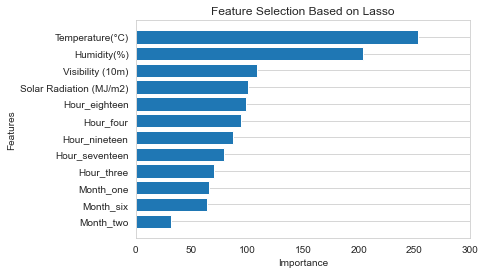

In [33]:
features = X_train.columns.tolist()

# plotting the Column Names and Importance of Columns
sorted_idx = np.argsort(coef)[::-1]
sorted_idx = np.argsort(abs(coef))[::-1]
fig, ax = plt.subplots()
ax.barh(range(len(features)), (abs(coef))[sorted_idx], color='#1f77b4')
plt.subplots_adjust(hspace=0.5)
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)
ax.set_title("Feature Selection Based on Lasso")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
ax.set_xlim(0, 300 )
ax.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

In [34]:
# deleting features with 0 coef
X_train = X_train.drop(list(np.array(features)[ abs(coef)  == 0]), axis = 1)
X_test  = X_test .drop(list(np.array(features)[ abs(coef)  == 0]), axis = 1)

## arima model

In [35]:
import pmdarima as pm
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error

arima_df = df_arm[['Date','Rented Bike Count']].set_index('Date').resample('D').sum()

In [36]:
model = pm.auto_arima(arima_df, start_p=1, start_q=1,
                      test='adf',       
                      max_p= 5 , max_q= 5, 
                      m=1,              
                      d=None,           
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6814.152, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6967.984, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6880.070, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6813.911, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6965.991, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6813.579, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6815.353, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6812.171, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6811.455, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6813.150, Time=0.19 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6813.828, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6816.192, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6811.532, Time=0.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6814.888, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0]          

In [37]:
# predicting with arima
split_point = int(len(arima_df) * 0.82)
train_data = arima_df[:split_point]
test_data = arima_df[split_point:]

order = (1,1,3)
model = sm.tsa.ARIMA(train_data, order=order)
arima_results = model.fit()
predictions = arima_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')
predictions

C:\Users\1\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2018-10-01    16855.708754
2018-10-02    14297.262229
2018-10-03    21032.751041
2018-10-04    14894.047080
2018-10-05    20488.843148
                  ...     
2018-11-26    17842.544538
2018-11-27    17801.591557
2018-11-28    17838.915979
2018-11-29    17804.898614
2018-11-30    17835.901937
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [38]:
r2_arima = r2_score(test_data, predictions)
r2_arima

0.02945459675152806

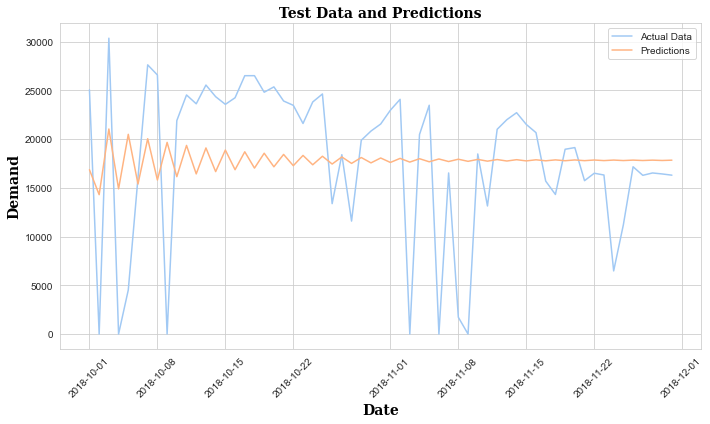

In [39]:
# ploting the actual data and pridictions
sns.set_palette("pastel")
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual Data')
plt.plot(predictions, label='Predictions')
plt.xticks(rotation=45)
plt.legend()
plt.title('Test Data and Predictions', fontdict=font)
plt.xlabel('Date', fontdict=font)
plt.ylabel('Demand', fontdict=font)
plt.grid(True)
plt.tight_layout()
plt.show()

## linear regression

In [40]:
#candidate Models for reg
import itertools

variables = list(X_train.columns)
candidate_variables = []

for r in range(1, len(variables)+1):
    candidate_variables.extend([list(combo) for combo in itertools.combinations(variables, r)])
candidate_variables,len(candidate_variables)

([['Temperature(°C)'],
  ['Humidity(%)'],
  ['Visibility (10m)'],
  ['Solar Radiation (MJ/m2)'],
  ['Hour_eighteen'],
  ['Hour_four'],
  ['Hour_nineteen'],
  ['Hour_seventeen'],
  ['Hour_three'],
  ['Month_one'],
  ['Month_six'],
  ['Month_two'],
  ['Temperature(°C)', 'Humidity(%)'],
  ['Temperature(°C)', 'Visibility (10m)'],
  ['Temperature(°C)', 'Solar Radiation (MJ/m2)'],
  ['Temperature(°C)', 'Hour_eighteen'],
  ['Temperature(°C)', 'Hour_four'],
  ['Temperature(°C)', 'Hour_nineteen'],
  ['Temperature(°C)', 'Hour_seventeen'],
  ['Temperature(°C)', 'Hour_three'],
  ['Temperature(°C)', 'Month_one'],
  ['Temperature(°C)', 'Month_six'],
  ['Temperature(°C)', 'Month_two'],
  ['Humidity(%)', 'Visibility (10m)'],
  ['Humidity(%)', 'Solar Radiation (MJ/m2)'],
  ['Humidity(%)', 'Hour_eighteen'],
  ['Humidity(%)', 'Hour_four'],
  ['Humidity(%)', 'Hour_nineteen'],
  ['Humidity(%)', 'Hour_seventeen'],
  ['Humidity(%)', 'Hour_three'],
  ['Humidity(%)', 'Month_one'],
  ['Humidity(%)', 'Month_six'

In [41]:
from sklearn.linear_model import LinearRegression

best_model = None
best_mse = float('inf')
best_R2ADJ = -float('inf')
best_r2_reg = 0

# Check all possible combinations of candidate variables
for variables in candidate_variables:
    regr_model = LinearRegression()
    regr_model.fit(X_train[variables], Y_train)
    Y_pred = regr_model.predict(X_test[variables])

    #MSE
    MSE = mean_squared_error(Y_test, Y_pred)

    #R2 Score
    r2 = r2_score(Y_test, Y_pred)

    #R2 Adjusted
    n = len(Y_test)
    p = len(variables)
    R2ADJ = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    if MSE < best_mse and R2ADJ > best_R2ADJ:
        best_model = variables
        best_mse = MSE
        best_R2ADJ = R2ADJ
        best_r2_reg = r2

In [42]:
# Create linear regression model with the best variables
X_train_selected = X_train[best_model]
model = LinearRegression()
model.fit(X_train_selected, Y_train)

# Obtain the coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_

# Print the equation of the best model
equation = "y = "
for i, variable in enumerate(best_model):
    coefficient = round(coefficients[i], 2)
    equation += f"({coefficient}) * {variable} + " 
equation += str(round(intercept, 2))

print("Best model equation : ", equation)
print()
print("Best model variables: ", best_model)
print()
print("MSE: ", best_mse)
print("R^2 adj: ", best_R2ADJ)


Best model equation :  y = (19.2) * Temperature(°C) + (-7.84) * Humidity(%) + (0.07) * Visibility (10m) + (578.69) * Hour_eighteen + (-444.72) * Hour_four + (497.28) * Hour_nineteen + (341.37) * Hour_seventeen + (-379.93) * Hour_three + (-342.88) * Month_one + (245.56) * Month_six + (-389.34) * Month_two + 862.22

Best model variables:  ['Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Hour_eighteen', 'Hour_four', 'Hour_nineteen', 'Hour_seventeen', 'Hour_three', 'Month_one', 'Month_six', 'Month_two']

MSE:  185564.90344166005
R^2 adj:  0.49100358201573824


## k-fold

In [43]:
from sklearn.model_selection import KFold

best_model_kfold = None
best_mse_kfold = float('inf')
best_R2ADJ_kfold = -float('inf')
best_model_Y2_pred = pd.DataFrame()
best_r2_kfold = 0

kf = KFold(n_splits=5 , shuffle=True, random_state=0)

for variables in candidate_variables:  
  mse_scores_kfold = []
  R2ADJ_scores_kfold = []
  
  # X_train is 80% of data
  for train_index, test_index in kf.split(X_train):
    X2_train, X2_test = X_train.iloc[train_index] , X_train.iloc[test_index]
    Y2_train, Y2_test = Y_train.iloc[train_index] , Y_train.iloc[test_index]
    
    regr_model.fit(X2_train[variables], Y2_train)
    Y2_pred = regr_model.predict(X2_test[variables])

    mse = mean_squared_error(Y2_test, Y2_pred)  
    r2 = r2_score(Y2_test, Y2_pred)

    n = len(Y2_test)
    p = len(variables)
    R2ADJ = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    mse_scores_kfold.append(mse)
    R2ADJ_scores_kfold.append(R2ADJ)

  avg_mse_kfold = np.mean(mse_scores_kfold)  
  avg_R2ADJ_kfold = np.mean(R2ADJ_scores_kfold)

  if avg_mse_kfold < best_mse_kfold and avg_R2ADJ_kfold > best_R2ADJ_kfold:
    best_model_kfold = variables
    best_model_Y2_pred = Y2_pred
    best_p=p
    best_r2_kfold = r2

In [44]:
#obtain y_pred from x_train by best model
best_model_X_test = X_test[best_model_kfold]
best_model_Y2_pred = regr_model.predict(best_model_X_test)


mse_kfold = mean_squared_error(Y_test, best_model_Y2_pred)  
r2 = r2_score(Y_test, best_model_Y2_pred)
R2ADJ_kfold = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - (best_p) - 1)

# Create linear regression model with the best variables
X_train_selected = X_train[best_model_kfold]
model = LinearRegression()
model.fit(X_train_selected, Y_train)


# Obtain the coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_


# Print the equation of the best model
equation = "y = "
for i, variable in enumerate(best_model_kfold):
    coefficient = round(coefficients[i], 2)
    equation += f"({coefficient}) * {variable} + " 
equation += str(round(intercept, 2))

print("Best model equation kfold: ", equation)
print()
print("Best model variables kfold: ", best_model_kfold)
print()
print("MSE kfold: ", mse_kfold)
print("R^2 adj kfold: ", R2ADJ_kfold)


Best model equation kfold:  y = (21.82) * Temperature(°C) + (-9.96) * Humidity(%) + (0.05) * Visibility (10m) + (-73.64) * Solar Radiation (MJ/m2) + (540.47) * Hour_eighteen + (-467.28) * Hour_four + (447.88) * Hour_nineteen + (324.04) * Hour_seventeen + (-403.92) * Hour_three + (-344.92) * Month_one + (245.03) * Month_six + (-383.36) * Month_two + 1030.45

Best model variables kfold:  ['Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Hour_eighteen', 'Hour_four', 'Hour_nineteen', 'Hour_seventeen', 'Hour_three', 'Month_one', 'Month_six', 'Month_two']

MSE kfold:  186162.44479274823
R^2 adj kfold:  0.4891401956881912


## random forest

In [45]:
X = df_rf.iloc[:,1:]
Y = df_rf.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.3, random_state = 0)

print(X_train.shape, X_test.shape)

(5338, 13) (2289, 13)


In [46]:
#Create train data
df_train = pd.concat([X_train, Y_train], axis = 1)

#Create test data
df_test = pd.concat([X_test, Y_test], axis = 1)

#Create Validation data
valid_train = df_train.sample(n = int(len(df_train)/10) )
valid_test = df_test.sample(n = int(len(df_test)/10) )

#final_result
df_valid = pd.concat([valid_train, valid_test], axis = 0).reset_index().drop('index', axis = 1)

#Training the Decision Tree model on the Training set
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]
x_valid = df_valid.iloc[:,:-1]
y_valid = df_valid.iloc[:,-1]
    
#grid search hyperparameter for the Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#define model
model = RandomForestClassifier()

#define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

In [ ]:
#define grid
grid = dict()
grid['n_estimators'] = [200,250,300,350,400]
grid['criterion'] = ['gini', 'entropy']
grid['max_depth'] = [18,20,22,24,26]

#define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = 1)

#perform the search
results = search.fit(x_train, y_train)

#finalization
print("MAE: %.3f" % results.best_score_)
print("Config: %s" % results.best_params_)

In [47]:
# build random forest model
RF_model = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=26)
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=26, n_estimators=400)

In [48]:
# predict Test set Results
y_t_pred = RF_model.predict(x_test)
y_v_pred = RF_model.predict(x_valid)

In [49]:
#MSE
best_MSE_rd_forest = mean_squared_error(y_test, y_t_pred)

#R2 Score
r2_rd_forest = r2_score(y_test, y_t_pred)

#R2 Adjusted
n = len(y_test)
p = x_test.shape[1]
best_R2ADJ_rd_forest = 1 - (1 - r2_rd_forest) * (n - 1) / (n - p - 1)
best_R2ADJ_rd_forest

0.7771913399601229

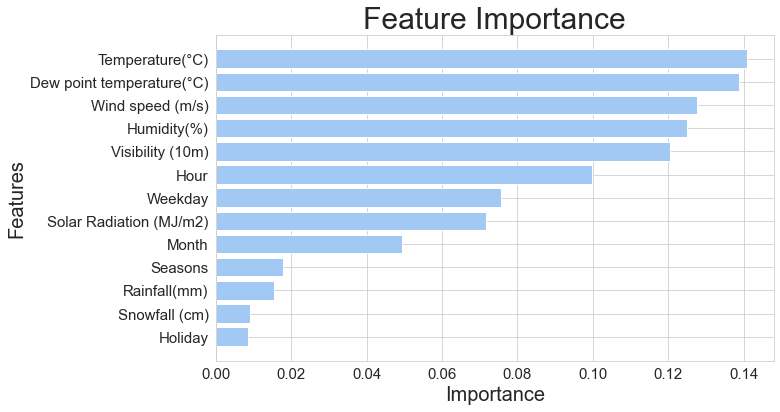

In [61]:
feature_importances = RF_model.feature_importances_
feature_names = X_train.columns
sorted_indices = feature_importances.argsort() 
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Feature Importance', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### evaluation of algorithm

In [51]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_t_pred)

#Accuracy Score
from sklearn.metrics import accuracy_score
print('Accuracy Score:')
print(accuracy_score(y_test, y_t_pred))
print(accuracy_score(y_valid, y_v_pred))
print()


#Precision and Recall
#Precision
from sklearn.metrics import precision_score
print('Precision Score:')
print(precision_score(y_test,y_t_pred, average='weighted'))
print()
     
#Recall
from sklearn.metrics import recall_score
print('Recall Score:')
print(recall_score(y_test,y_t_pred, average='weighted'))
print()

#F1-Score
from sklearn.metrics import f1_score
print('F1 Score:')
print(f1_score(y_test,y_t_pred, average='weighted'))
print()


Accuracy Score:
0.0017474879860200961
0.7017082785808147

Precision Score:
0.0008810251929517984

Recall Score:
0.0017474879860200961

F1 Score:
0.0011389877051738127



C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# The best possible model

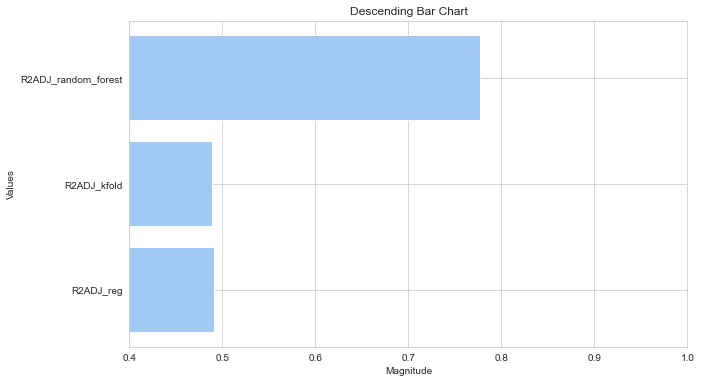

In [52]:
values = [best_R2ADJ, R2ADJ_kfold, best_R2ADJ_rd_forest]
labels = ['R2ADJ_reg', 'R2ADJ_kfold', 'R2ADJ_random_forest']
plt.figure(figsize=(10, 6))
plt.barh(labels, values)
plt.title('Descending Bar Chart')
plt.xlabel('Magnitude')
plt.ylabel('Values')
plt.xlim(left=0.4)
plt.xlim(right=1)
plt.show()

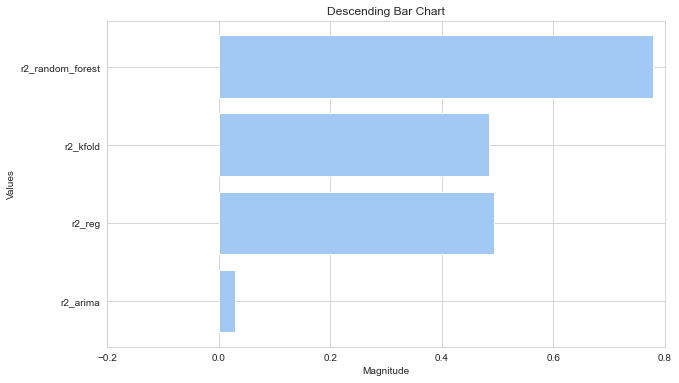

In [53]:
values = [r2_arima, best_r2_reg, best_r2_kfold,r2_rd_forest ]
labels = ['r2_arima', 'r2_reg', 'r2_kfold','r2_random_forest']
plt.figure(figsize=(10, 6))
plt.barh(labels, values)
plt.title('Descending Bar Chart')
plt.xlabel('Magnitude')
plt.ylabel('Values')
plt.xlim(left=-0.2)
plt.xlim(right=0.8)
plt.show()


### The fitted model with Random Forest has the best R2 and R2adj


## Forecast using the best model for the next three days


In [54]:
#The fitted model with Random Forest has the best R2 and R2adj

dt = pd.read_csv('F:/PredictionData.csv', encoding='latin-1')
dt

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2018,0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes
1,1/12/2018,1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes
2,1/12/2018,2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,Winter,Holiday,Yes
3,1/12/2018,3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,Winter,Holiday,Yes
4,1/12/2018,4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7/12/2018,19,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,Winter,No Holiday,Yes
164,7/12/2018,20,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,Winter,No Holiday,Yes
165,7/12/2018,21,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,Winter,No Holiday,Yes
166,7/12/2018,22,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,Winter,No Holiday,Yes


In [55]:
#missing values
dt.isnull().sum()

Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [56]:
#duplicate values
dt.duplicated().sum()

0

In [57]:
dt['Date']=pd.to_datetime(dt['Date'], format='%d/%m/%Y')

dt['Holiday'].value_counts()
dt = dt.replace({"Holiday": 'No Holiday'}, 0).replace({'Holiday':"Holiday"}, 1)

dt['Weekday'] = pd.to_datetime(dt['Date']).dt.strftime('%A')
dt['month'] = dt['Date'].dt.month

dt['Weekday'] = dt['Weekday'].replace({'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 0, 'Sunday': 1})
dt['Seasons'] = dt['Seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4})

In [58]:
#Predict for 3 days whit random forest
X = dt.loc[dt['Date'] <= '2018-12-03'].drop('Functioning Day', axis=1).drop('Date', axis=1)

dt = dt.loc[dt['Date'] <= '2018-12-03']
y_pred = np.where(dt['Functioning Day']=='No', 0,  RF_model.predict(X))

dt['Target'] = y_pred 
dt

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,month,Target
0,2018-12-01,0,-4.3,55,1.6,1247,-12.7,0.0,0.0,0.00,4,1,Yes,0,12,184
1,2018-12-01,1,-4.8,57,1.2,1219,-12.7,0.0,0.0,0.00,4,1,Yes,0,12,184
2,2018-12-01,2,-5.5,56,1.4,1285,-12.9,0.0,0.0,0.00,4,1,Yes,0,12,176
3,2018-12-01,3,-5.6,50,1.0,1367,-13.0,0.0,0.0,0.00,4,1,Yes,0,12,103
4,2018-12-01,4,-5.9,51,1.1,1260,-12.2,0.0,0.0,0.00,4,1,Yes,0,12,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2018-12-03,19,0.9,67,1.6,290,-0.8,0.0,0.0,0.20,4,0,Yes,2,12,218
68,2018-12-03,20,1.0,77,1.9,407,-0.6,0.0,0.0,0.10,4,0,Yes,2,12,218
69,2018-12-03,21,0.7,74,6.7,692,-2.8,0.0,0.9,0.05,4,0,Yes,2,12,149
70,2018-12-03,22,0.1,71,4.6,740,-5.1,0.0,0.0,0.00,4,0,Yes,2,12,149


In [59]:
df5 = df5.sort_values(by='Date')
print(df5['Rented Bike Count'])
print()
print(df5['Date'])

0       206
23      154
22      168
21      203
20      206
       ... 
7604    456
7603    474
7625    712
7613    554
7626    584
Name: Rented Bike Count, Length: 7627, dtype: int64

0      2018-01-01
23     2018-01-01
22     2018-01-01
21     2018-01-01
20     2018-01-01
          ...    
7604   2018-11-30
7603   2018-11-30
7625   2018-11-30
7613   2018-11-30
7626   2018-11-30
Name: Date, Length: 7627, dtype: datetime64[ns]


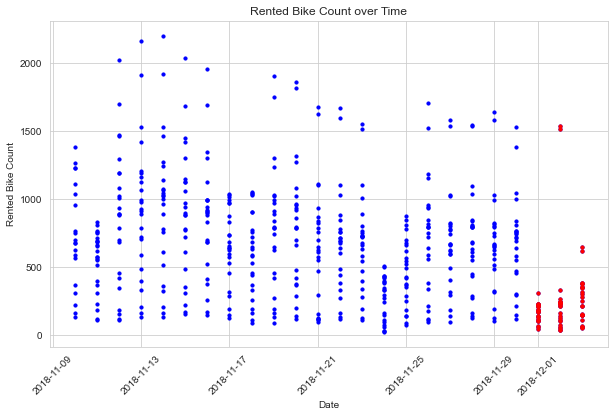

In [60]:
#3 days with 500 days before it
y = list(df5['Rented Bike Count'][-500:]) + list(dt['Target'])
x = list(df5['Date'][-500:]) + list(dt['Date'])

plt.figure(figsize=(10, 6))
plt.scatter(x, y,c='blue', s=10)
plt.scatter(dt['Date'], dt['Target'], c='red', s=10)
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count over Time')
plt.xticks(rotation=45)
plt.show()